In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
blk=pd.read_csv("https://raw.githubusercontent.com/stellahrotich/MLProjects101/master/BlackFriday.csv")
blk.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
blk.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [4]:
blk = blk.astype({"Occupation": str}, errors='ignore') 
blk = blk.astype({"Product_Category_1": str}, errors='ignore')
blk = blk.astype({"Marital_Status": str}, errors='ignore')

In [5]:
blk.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
blk.shape

(537577, 12)

In [7]:
blk.Gender.describe()

count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

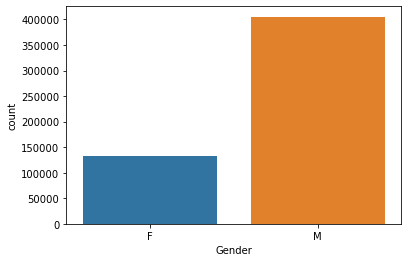

In [8]:
sns.countplot(x="Gender",data=blk)

In [9]:
blk.Age.describe()

count     537577
unique         7
top        26-35
freq      214690
Name: Age, dtype: object

In [10]:
blk.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

<AxesSubplot:xlabel='Age', ylabel='count'>

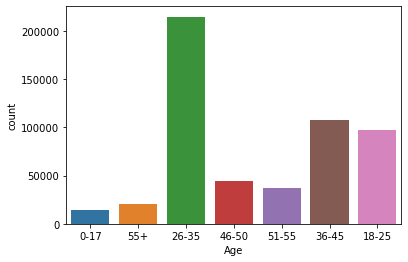

In [11]:
sns.countplot(x="Age",data=blk)

In [12]:
blk.Occupation.describe()

count     537577
unique        21
top            4
freq       70862
Name: Occupation, dtype: object

In [13]:
blk.Occupation.nunique()

21

<AxesSubplot:xlabel='Occupation', ylabel='count'>

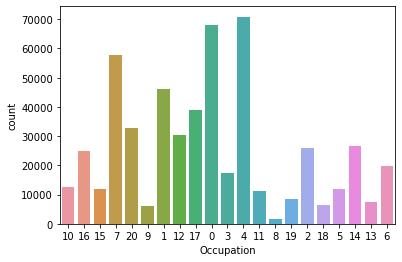

In [14]:
sns.countplot(x="Occupation",data=blk)

In [15]:
blk.City_Category.describe()

count     537577
unique         3
top            B
freq      226493
Name: City_Category, dtype: object

In [16]:
blk.City_Category.nunique()

3

<AxesSubplot:xlabel='City_Category', ylabel='count'>

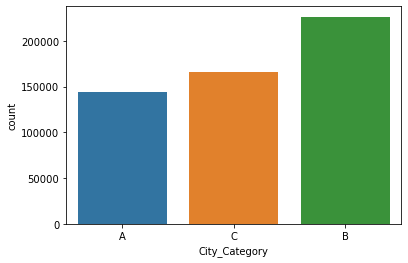

In [17]:
sns.countplot(x="City_Category",data=blk)

In [18]:
blk.Stay_In_Current_City_Years.describe()

count     537577
unique         5
top            1
freq      189192
Name: Stay_In_Current_City_Years, dtype: object

In [19]:
blk.Stay_In_Current_City_Years.nunique()

5

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

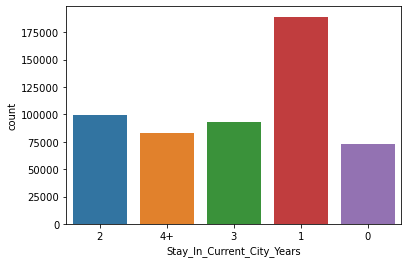

In [20]:
sns.countplot(x="Stay_In_Current_City_Years",data=blk)

In [21]:
blk.Marital_Status.describe()

count     537577
unique         2
top            0
freq      317817
Name: Marital_Status, dtype: object

In [22]:
blk.Marital_Status.nunique()

2

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

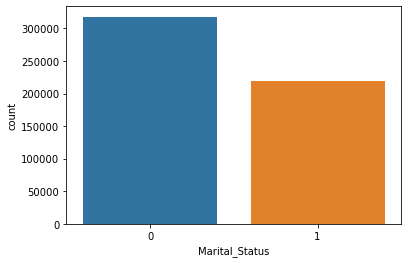

In [23]:
sns.countplot(x="Marital_Status",data=blk)

In [24]:
blk.Product_Category_1.describe()

count     537577
unique        18
top            5
freq      148592
Name: Product_Category_1, dtype: object

In [25]:
blk.Product_Category_1.nunique()

18

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

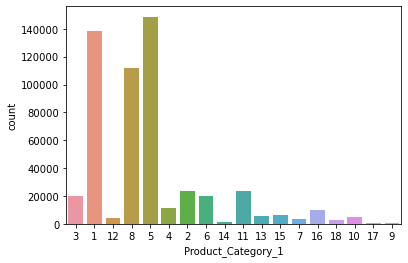

In [26]:
sns.countplot(x="Product_Category_1",data=blk)

In [27]:
blk.Product_Category_2.describe()

count    370591.000000
mean          9.842144
std           5.087259
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [28]:
blk.Product_Category_2.isnull().sum()

166986

In [29]:
blk.Product_Category_2.nunique()

17

In [30]:
blk.Product_Category_2.fillna("Others",inplace=True)

In [31]:
blk.Product_Category_3.describe()

count    164278.000000
mean         12.669840
std           4.124341
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [32]:
blk.Product_Category_3.isnull().mean()

0.6944102891306734

In [33]:
blk.drop(["User_ID","Product_ID","Product_Category_3"],axis=1,inplace=True)

In [34]:
blk.shape

(537577, 9)

In [35]:
X=blk[["Purchase","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category_1","Product_Category_2"]]

In [36]:
X.shape

(537577, 9)

In [37]:
X1=pd.get_dummies(X)

In [38]:
X1.shape

(537577, 77)

In [39]:
X1.head(4)

,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_Others
0,8370,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15200,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1422,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1057,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X1)
scaled_data=scaler.transform(X1)

In [41]:
x1= pd.DataFrame(scaled_data)
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.344255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.631519,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052027,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.036676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.327389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
y=x1.iloc[:,0]
x=x1.drop(0,axis=1)

In [43]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =50)

<h2>Linear Regression</h2>

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [54]:
model=LinearRegression().fit(x,y)

In [55]:
model.score(x,y)

0.6340358380227128

<h2>DecisionTreeRegressor</h2>

In [47]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))

Train Score = 0.7414397697107935
Test Score = 0.6001898018117935


<h2>RandomForestRegressor</h2>

In [48]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
model2.score(x_train,y_train)

In [ ]:
model2.score(x_test,y_test)

<h2>GradientBoostingRegressor</h2>

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [59]:
model3.score(x_train,y_train)

0.637107306601391

In [60]:
model3.score(x_test,y_test)

0.6365543825883009

<h2>AdaBoostRegressor</h2>

In [61]:
from sklearn.ensemble import AdaBoostRegressor
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [62]:
regress.score(x_train,y_train)

0.4322477926215532

In [63]:
regress.score(x_test,y_test)

0.43061151746897364

<h3>PCA</h3>

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca=PCA()
pca.fit(x_train,y_train)

PCA()

In [51]:
Z=(pca.explained_variance_ratio_)

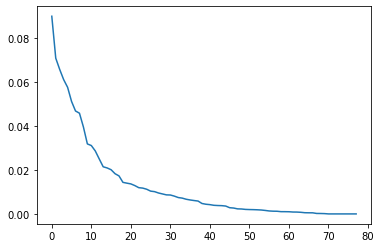

In [52]:
plt.plot(Z)

<h3>Cumsum</h3>

In [53]:
import numpy as np
cumulative=np.cumsum(Z)
print(cumulative)

[0.09009482 0.16108723 0.22693071 0.28814663 0.34584046 0.39710715
 0.44402508 0.48992337 0.52954506 0.56145093 0.59261346 0.62131854
 0.6463846  0.66786966 0.68882605 0.70896982 0.72729992 0.7446235
 0.75900741 0.77302478 0.78670241 0.79962066 0.81158422 0.82335088
 0.8346035  0.84499278 0.85514447 0.86468088 0.87378686 0.88246516
 0.89108427 0.89919407 0.90665151 0.91385199 0.92053589 0.92689429
 0.93299015 0.93885308 0.94359994 0.94800928 0.95223965 0.95616685
 0.95999124 0.96375581 0.96733954 0.97016608 0.97284605 0.97514826
 0.97739292 0.97944756 0.9814356  0.9833848  0.9852654  0.98704401
 0.98862586 0.98997089 0.99121469 0.99242707 0.99345515 0.99447578
 0.99546601 0.99632788 0.99716695 0.99790195 0.99844948 0.99895961
 0.99945765 0.99966922 0.99986104 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


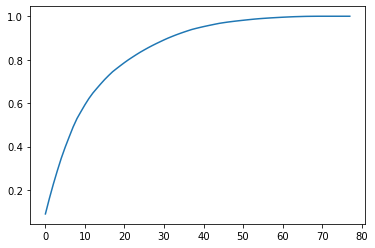

In [54]:
plt.plot(cumulative)

In [55]:
pca=PCA(n_components=56)
pca.fit(x_train)
components=pca.transform(x_train)

In [56]:
components=pd.DataFrame(components)

In [57]:
components.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.605278,1.365299,-0.578990,0.323257,0.246579,-0.410935,-0.602004,0.354550,-0.320981,-0.666292,...,-0.021643,0.004136,-0.013140,-0.026048,-0.026009,-0.038368,-0.000553,0.004560,-0.000576,-0.004561
1,0.928058,1.093167,0.486890,0.075707,0.114274,0.356032,1.014826,-0.230886,0.683057,0.008400,...,0.604807,0.009731,-0.175735,0.010502,-0.038870,-0.050666,0.083666,0.000487,-0.033836,0.013113
2,-0.539869,0.102992,0.160187,1.372793,0.112493,0.797347,0.219230,0.473396,0.289314,0.032970,...,-0.029209,0.017249,-0.015505,0.013122,-0.021026,0.010561,-0.004156,0.007215,0.001042,-0.005042
3,-0.479417,0.134397,-0.696007,-0.082753,-0.810394,0.775602,0.229329,-0.256921,0.659949,0.060989,...,-0.183294,-0.113005,0.109523,-0.050659,0.031474,-0.011905,-0.119982,-0.006312,0.092244,-0.079600
4,-0.530838,1.088524,-0.533738,-0.260775,0.750363,0.679228,-0.070582,-0.635253,-0.484593,0.074564,...,0.071561,-0.003834,-0.029793,-0.029487,-0.035948,-0.029872,0.027681,-0.001726,0.064471,-0.035626


In [56]:
import pickle #converts our file into binary file

In [57]:
file=open('linear_regression.pkl','wb')

In [58]:
pickle.dump(model,file)